In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# suppress scientific notation in Numpy
np.set_printoptions(suppress=True)

# Generate Data Points

### Moon shape data

<img src="data/moon_shapes.png" width='250'>

In [3]:
raw_moon_data = datasets.make_moons(n_samples=1000)
len(raw_moon_data)

2

In [4]:
moon_data = raw_moon_data[0]
print(moon_data.shape)

(1000, 2)


In [5]:
moon_labels = raw_moon_data[1]
print(moon_labels.shape)

(1000,)


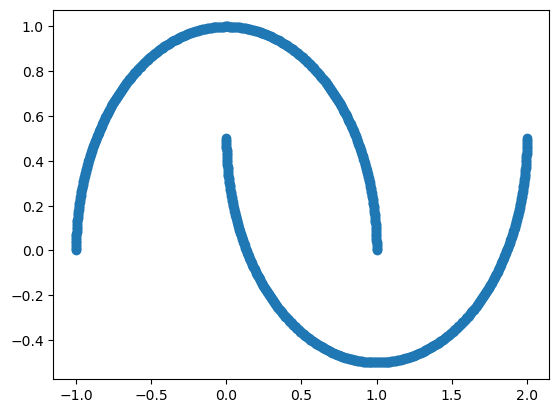

In [6]:
# visualize it
plt.plot(moon_data[:,0], moon_data[:,1], 'o')

In [7]:
moon_data_min = np.min(moon_data)
moon_data_max = np.max(moon_data)
moon_data_mean = np.mean(moon_data)
moon_data_std = np.std(moon_data)
print(f'min: {moon_data_min}')
print(f'max: {moon_data_max}')
print(f'mean: {moon_data_mean}')
print(f'std: {moon_data_std}')

min: -1.0
max: 2.0
mean: 0.375
std: 0.7162673323855463


In [8]:
# create noise
noises = np.random.normal(loc = moon_data_mean, # mean
                          scale = moon_data_std, # std
                          size = (moon_data.shape[0], moon_data.shape[1]))

noises

array([[ 1.34958637,  0.47914966],
       [ 0.56750279,  1.44014234],
       [ 0.39819816,  0.89987087],
       ...,
       [ 0.90326564, -0.09499342],
       [-0.0345856 , -0.40248264],
       [-0.84546937,  0.0850178 ]])

In [9]:
moon_data_jitter = moon_data + noises

moon_data_j_min = np.min(moon_data_jitter)
moon_data_j_max = np.max(moon_data_jitter)
moon_data_j_mean = np.mean(moon_data_jitter)
moon_data_j_std = np.std(moon_data_jitter)
print(f'min: {moon_data_j_min}')
print(f'max: {moon_data_j_max}')
print(f'mean: {moon_data_j_mean}')
print(f'std: {moon_data_j_std}')

min: -2.441238466032335
max: 3.787571369331954
mean: 0.7421088944454239
std: 0.9965377995465846


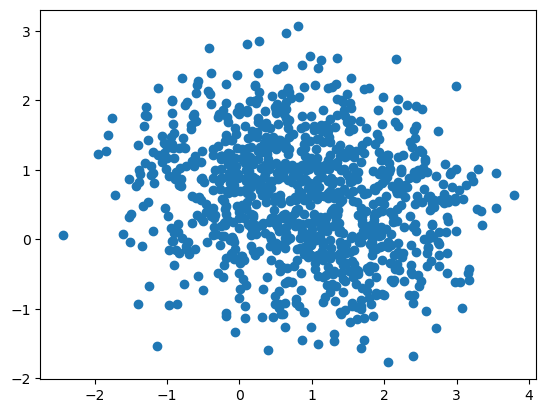

In [10]:
# visualize it
plt.plot(moon_data_jitter[:,0], moon_data_jitter[:,1], 'o')

It was too noisy and entirely messed up the moon shapes.

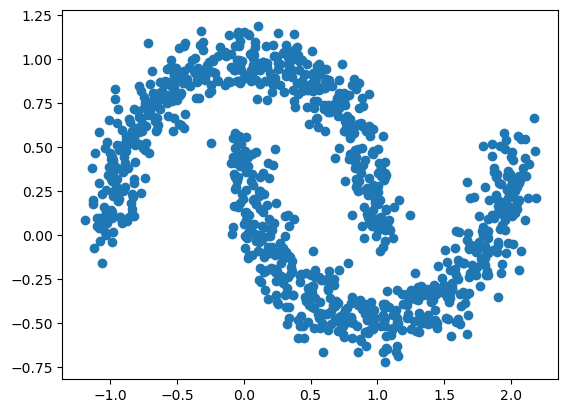

In [11]:
# create noise#2
noises = np.random.normal(loc = 0, # mean
                          scale = 0.1, # std
                          size = (moon_data.shape[0], moon_data.shape[1]))

moon_data_jitter = moon_data + noises
plt.plot(moon_data_jitter[:,0], moon_data_jitter[:,1], 'o')

Harded coded standard deviation worked much better.

So `moon_data_jitter` will be my input for the spectral clustering.

### Two rings data

<img src="data/two_rings.png" width='250'>

In [12]:
angles = np.random.randint(low = 0, high = 359, size = 300)

In [87]:
radius = 1

In [89]:
original_vector = (0, 1)
center = (1, 3)

Use the [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix) to first obtain the data points *exactly* located on the circle.

x and y are the endpoint coordinates of a vector,

Note that `cos` and `sin` functions take in angles in *radians* instead of *degrees*. Hint: 2$\pi$ radian equals 360 degrees.

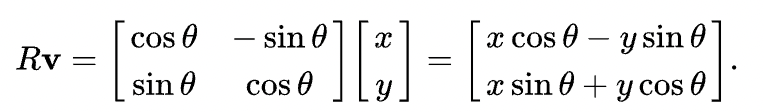

In [98]:
# test 
original_v = np.array(original_vector)[:,None]
print(f'from point: ({original_v[0][0]}, {original_v[1][0]})')

c = np.array(center)[:,None]
print(f'center: ({c[0][0]}, {c[1][0]})')

adjusted_v = original_v - c
print(f'adjusted starting point centered at (0,0): ({adjusted_v[0][0]},{adjusted_v[1][0]})')

test_angle = 90
print(f'rotate {test_angle} degrees...')
test_radian = test_angle*(np.pi/180)
rotation_matrix = np.array([[np.cos(test_radian), -np.sin(test_radian)],
                           [np.sin(test_radian), np.cos(test_radian)]])
rotated_v = rotation_matrix @ adjusted_v 
coor_rotated = np.around(rotated_v + c).astype(int)
print(f'to point: ({coor_rotated[0][0]}, {coor_rotated[1][0]})\n')

from point: (0, 1)
center: (1, 3)
adjusted starting point centered at (0,0): (-1,-2)
rotate 90 degrees...
to point: (3, 2)



In [105]:
def create_points_on_circle(center, original_coor, degrees):
    # original_v has the coordiates of the vector, whose might not point to (0,0)    
    # move the vector to start from (0,0)
    original_v = np.array(original_coor)[:,None]
    c = np.array(center)[:,None]
    
    adjusted_v = original_v - c
    
    radian = degrees*(np.pi/180)
    rotation_matrix = np.array([[np.cos(radian), -np.sin(radian)],
                               [np.sin(radian), np.cos(radian)]])
    
    rotated_v = rotation_matrix @ adjusted_v 
    coor_rotated = rotated_v + c
    
    return coor_rotated[0][0], coor_rotated[1][0]

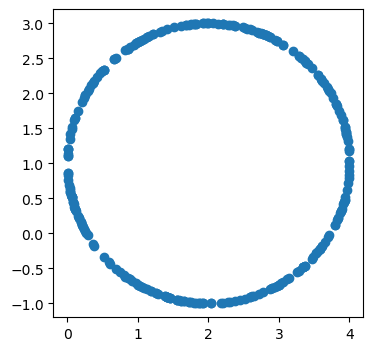

In [106]:
original_coor = (0, 1)
center = (2, 1)
points_on_circle = np.empty([len(angles), 2]) # 2 is x and y coordinates

for i in range(len(angles)):
    points_on_circle[i, :] = create_points_on_circle(center, original_coor, angles[i])
    
# visualize it
plt.figure(figsize=(4,4))
plt.plot(points_on_circle[:,0], points_on_circle[:,1], 'o')

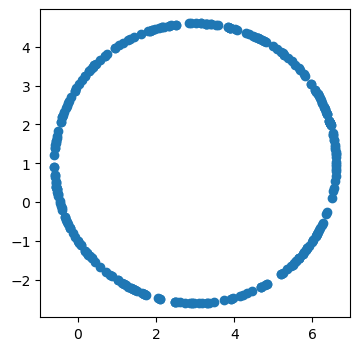

In [107]:
original_coor = (5, -2)
center = (3, 1)
points_on_circle = np.empty([len(angles), 2]) # 2 is x and y coordinates

for i in range(len(angles)):
    points_on_circle[i, :] = create_points_on_circle(center, original_coor, angles[i])
    
# visualize it
plt.figure(figsize=(4,4))
plt.plot(points_on_circle[:,0], points_on_circle[:,1], 'o')

In [108]:
# add noises
noise = np.random.normal(loc = 0, #mean
                         scale = 0.05, # std
                         size = (len(angles), 2))
points_on_circle = points_on_circle + noise

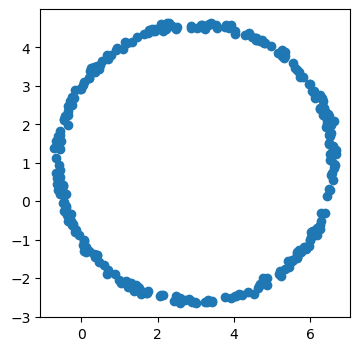

In [109]:
# visualize it
plt.figure(figsize=(4,4))
plt.plot(points_on_circle[:,0], points_on_circle[:,1], 'o')

In [112]:
def create_circle_data(center, size, radius):
    angles = np.random.randint(low = 0, high = 359, size = size)
    original_coor = (0, radius)
    
    points_on_circle = np.empty([len(angles), 2]) # 2 is x and y coordinates

    # create points based on the random generated degrees
    for i in range(len(angles)):
        points_on_circle[i, :] = create_points_on_circle(center, original_coor, angles[i])
    
    # add noise
    noise = np.random.normal(loc = 0, #mean
                             scale = radius/20, # std 
                             # 20 is based on experiment, too small will lose the shape
                             
                             size = (len(angles), 2))
    circle_data = points_on_circle + noise
    
    return circle_data

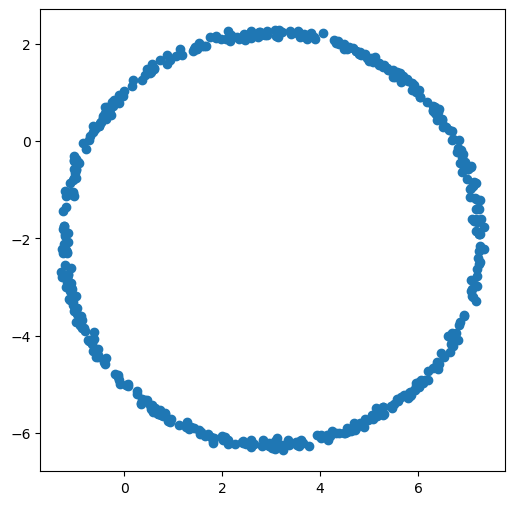

In [123]:
n = 500
center = (3, -2)
num_of_circles = 2
radiuses = [1, 1]
cutoff = int(n/num_of_circles)

circle_data = np.empty((n, 2))

# get the data points for different circle properties
for i in range(num_of_circles):
    starting_idx = int(i * cutoff)
    ending_idx = int((i+1) * cutoff)
    circle_data[starting_idx:ending_idx,:] = create_circle_data(center=center, 
                                                                size=cutoff, 
                                                                radius=radiuses[i])

# plot it
plt.figure(figsize=(6,6))
plt.plot(circle_data[:,0], circle_data[:,1], 'o')

The data points are evenly split between the circles regardless of the size of the circles. Smaller circles should have less data points. Maybe the data points can be split by ratio of the circles' circumferences. Larger circle obtain more data points.

Let's consider one thing first: The possibility that circles intersect with each other instead of always lying at the origin (0, 0)

In [22]:
# assign different centers still close to other circles, or else lose the purposes
def create_circle_data_v2(center, size, radius, data):
    # generate angles that will be used to create points on circles
    angles = np.random.randint(low = 0, high = 359, size = size)
    
    # find the starting point
    starting_point = find_center_and_starting_point(data, radius)

    points_on_circle = np.empty([len(angles), 2]) # 2 is x and y coordinates

    # create points based on the random generated degrees
    for i in range(len(angles)):
        points_on_circle[i, :] = create_points_on_circle(center, starting_point, angles[i])

    # add noise
    circle_data_jitter = jitter_circle(points_on_circle, radius, size)
    
    return circle_data_jitter

In [23]:
# assign centers
def find_center_and_starting_point(data, radius):
    # if no circles yet, uses (0, 0) as the center
    if np.sum(np.isfinite(data)) == 0:
        center = np.array([[0], [radius]])
        print(center)
        return center
    # or else, use one existing point on any circle as the center
    else:
        # valid points are not infinite, so it returns false, and sum of false is 0
        valid_vs_inf_by_row = np.sum(np.isinf(data), axis = 1) 
        
        # get the count of sum of 0 (false)
        num_of_valid_points = np.bincount(valid_vs_inf_by_row)[0]
        
        # find one random existing point as the center
        idx = np.random.randint(low = 0, high = num_of_valid_points, size = 1)
        center = data[idx, :].reshape((2, 1)) 
        print(center + np.array([[radius], [radius]]))
        return center + np.array([[radius], [radius]])

In [24]:
# add noise
def jitter_circle(points_on_circle, radius, n):
    noise = np.random.normal(loc = 0, #mean
                             scale = radius/20, # std, based on experiment, scale too big will lose the shape
                             size = (n, 2))
    return points_on_circle + noise    

[[0]
 [5]]
[[2.05181581]
 [5.81767509]]


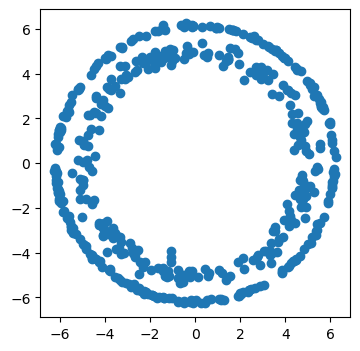

In [33]:
n = 500
num_of_circles = 2
radiuses = [5, 1]
cutoff = int(n/num_of_circles)

circle_data = np.full((n, 2), np.inf)

for i in range(num_of_circles):
    starting_idx = int(i * cutoff) # 0, 250
    ending_idx = int((i+1) * cutoff) # 250, 500
    circle_data[starting_idx:ending_idx,:] = create_circle_data_v2(center=center,
                                                                   size=cutoff, 
                                                                   radius=radiuses[i], 
                                                                   data=circle_data)

plt.figure(figsize=(4,4))
plt.plot(circle_data[:,0], circle_data[:,1], 'o')

# Spectral Clustering

In [26]:
moon_data_jitter

array([[ 1.19055091, -0.3905584 ],
       [-0.31210362,  0.92155121],
       [ 1.63945254, -0.3217915 ],
       ...,
       [-0.93754238,  0.4868599 ],
       [ 0.05609819,  0.93915568],
       [-0.46662757,  0.8089759 ]])